# Book Recommendation System Using K Nearest Neighbor

**Dataset url - http://www2.informatik.uni-freiburg.de/~cziegler/BX/**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, 
                    encoding="latin-1")

books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 
                 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']  #renaming columns


users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, 
                    encoding="latin-1")


users.columns = ['userID', 'Location', 'Age']


ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False,
                      encoding="latin-1")

ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [5]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


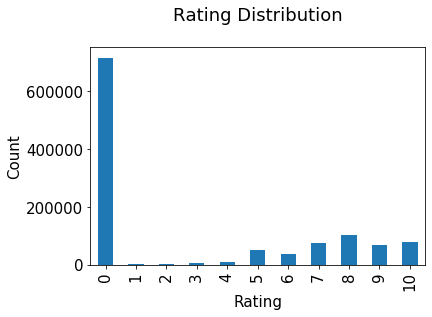

In [6]:
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [7]:
print(books.shape)
print(list(books.columns))

(271360, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


In [8]:
print(users.shape)
print(list(users.columns))

(278858, 3)
['userID', 'Location', 'Age']


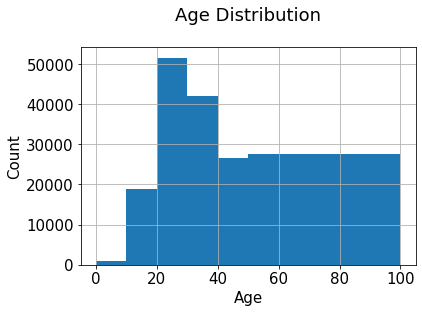

In [9]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [10]:
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

## Collaborative Filtering Using k-Nearest Neighbors (kNN)

kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors. For example, we first present ratings in a matrix with the matrix having one row for each item (book) and one column for each user,

In [13]:
combine_book_rating = pd.merge(ratings,books,on="ISBN")
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [14]:
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


**We then group by book titles and create a new column for total rating count.**

In [28]:
combine_book_rating =combine_book_rating.dropna(axis=0,subset=['bookTitle'])

book_ratingCount=(
    combine_book_rating.
    groupby(by=["bookTitle"])['bookRating'].
    count().
    reset_index().
    rename(columns = {'bookRating': 'totalRatingCount'})
     
)

In [30]:
book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


We combine the rating data with the total rating count data, this gives us exactly what we need to find out which books are popular and filter out lesser-known books.

In [39]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount,left_on = 'bookTitle', 
                                                          right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [34]:
print(book_ratingCount['totalRatingCount'].describe())

count    160576.000000
mean          3.043680
std           7.428434
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         365.000000
Name: totalRatingCount, dtype: float64


popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()


In [41]:
rating_popular_book.shape

(62149, 5)

### To decrease computation we will consider users in US and CANADA only 

### Filter to users in US and Canada only

In [43]:
combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa"
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"knoxville, tennessee, usa"
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"byron, minnesota, usa"
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"cordova, tennessee, usa"
5,16795,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"mechanicsville, maryland, usa"


## Implementing kNN
We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

Finding the Nearest Neighbors We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “brute”, and we specify “metric=cosine” so that the algorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model.

In [44]:
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])

In [45]:
#creating pivot table
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID',
                                                          values = 'bookRating').fillna(0)

In [46]:
from scipy.sparse import csr_matrix
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)


In [47]:
from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [86]:
test_index = np.random.choice(us_canada_user_rating_pivot.shape[1]) #shape[1] returns number of columns
print(test_index)

270


In [88]:
data =us_canada_user_rating_pivot.iloc[test_index,:].values.reshape(1,-1)

In [89]:
data.shape

(1, 734)

In [90]:
distances, indices = model_knn.kneighbors(data, 
                                          n_neighbors = 6)


In [94]:
us_canada_user_rating_pivot.index[270]

"I'll Be Seeing You"

In [99]:
distances,indices 

(array([[2.22044605e-16, 5.26645614e-01, 5.50114739e-01, 6.16367654e-01,
         6.48171050e-01, 6.52610734e-01]]),
 array([[270, 742, 313, 376, 323, 565]], dtype=int64))

In [101]:
for i in range(0, len(distances.flatten())): #flatten to make 1 d array
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[test_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for I'll Be Seeing You:

1: You Belong To Me, with distance of 0.5266456143446077:
2: Let Me Call You Sweetheart, with distance of 0.5501147388800636:
3: On the Street Where You Live, with distance of 0.6163676535327567:
4: Loves Music, Loves to Dance, with distance of 0.648171049712764:
5: The Ghost, with distance of 0.6526107335815865:
